In [1]:
import pandas as pd

file_1_path = 'query2019-20.csv'
file_2_path = 'query2021-22.csv'
file_3_path = 'query2023-24.csv'

df1 = pd.read_csv(file_1_path)
df2 = pd.read_csv(file_2_path)
df3 = pd.read_csv(file_3_path)

combined_df = pd.concat([df1, df2, df3])

combined_df['time'] = pd.to_datetime(combined_df['time'])

combined_df = combined_df.sort_values(by='time')

output_file = 'combined_query.csv'
combined_df.to_csv(output_file, index=False)

print(f"Data has been combined and saved to {output_file}")


Data has been combined and saved to combined_query.csv



Descriptive Statistics:
           latitude     longitude         depth           mag           nst  \
count  43114.000000  43114.000000  43114.000000  43114.000000  43114.000000   
mean      -2.135464     31.851441     59.566543      4.801842     68.822842   
std       29.921192    122.930461    110.505677      0.367682     32.561319   
min      -69.773900   -179.999700     -0.570000      4.500000      6.000000   
25%      -22.755800    -72.496675     10.000000      4.500000     66.000000   
50%       -4.469450     91.872600     10.000000      4.700000     68.809679   
75%       19.245375    139.155700     55.543000      4.900000     68.809679   
max       87.386000    179.998400    667.390000      8.100000    619.000000   

                gap          dmin           rms  horizontalError  \
count  43114.000000  43114.000000  43114.000000     43114.000000   
mean      90.328218      4.522805      0.743638         8.376908   
std       42.883351      5.594266      0.228264         2.9

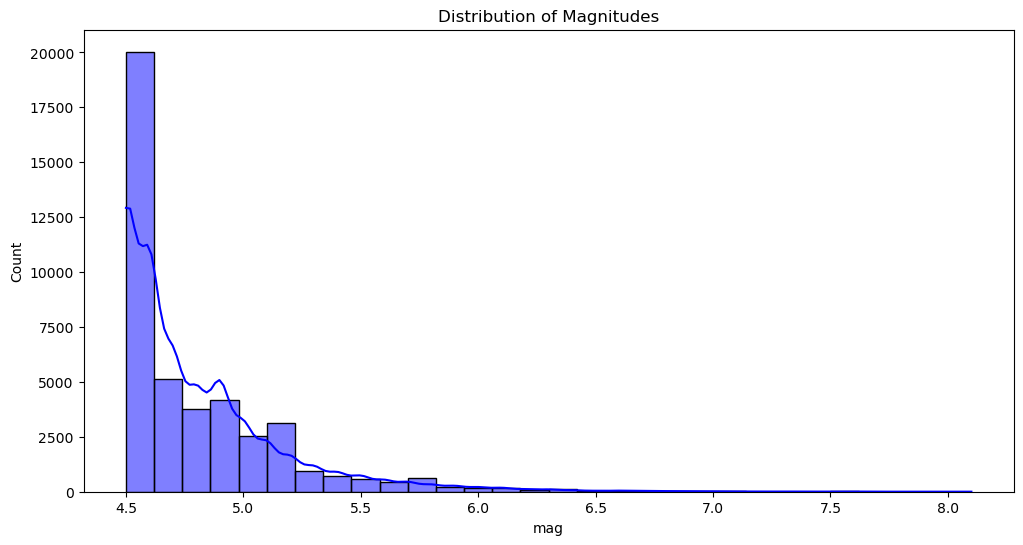

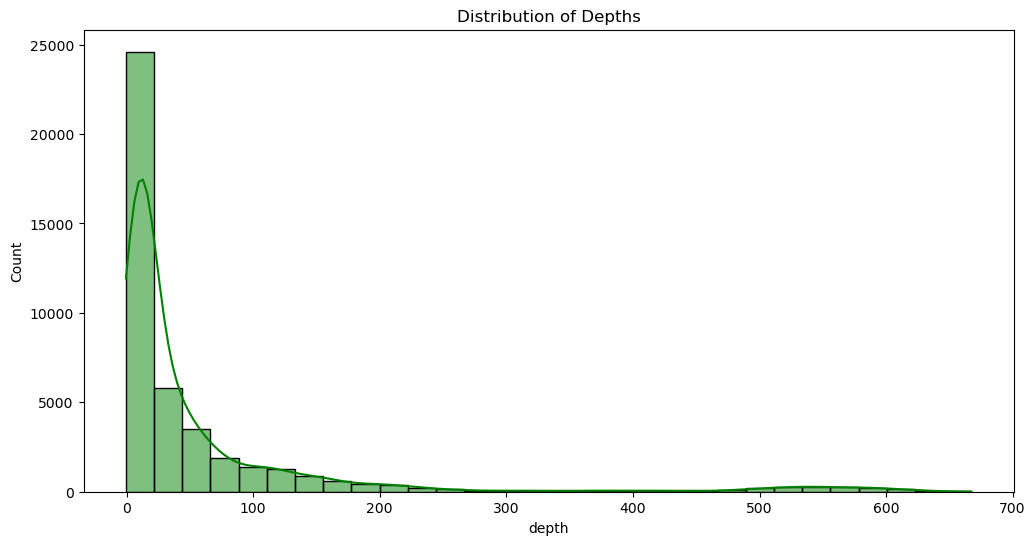

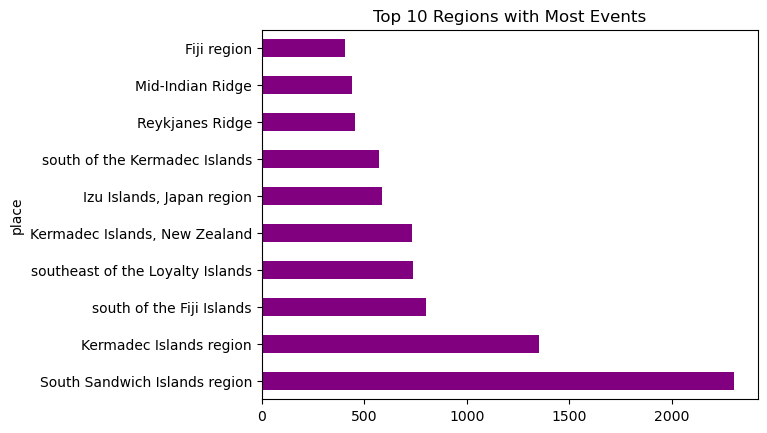

C:\Users\Ashik\AppData\Local\Temp\ipykernel_4616\498916575.py:41: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['year_month'] = data['time'].dt.to_period('M')


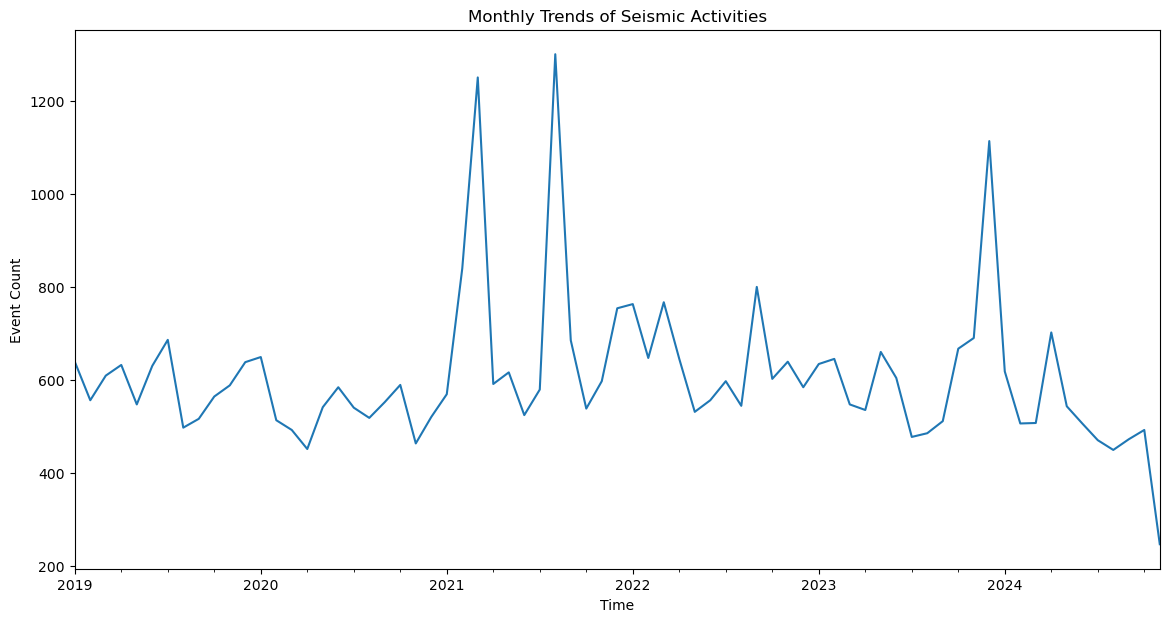

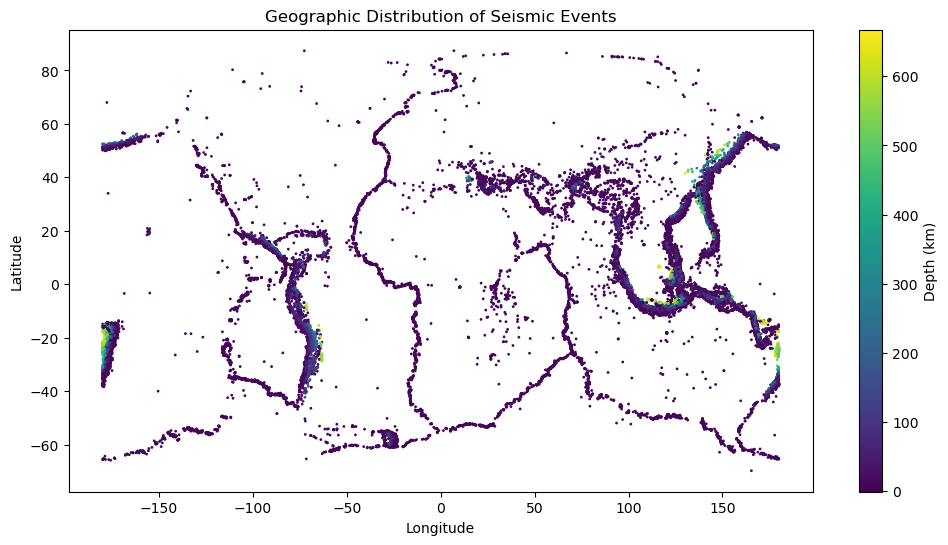

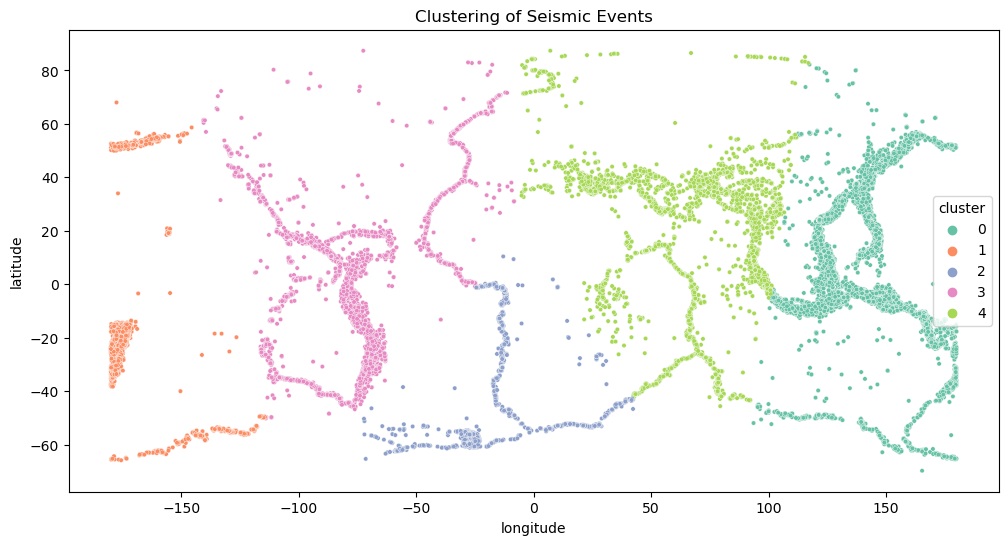

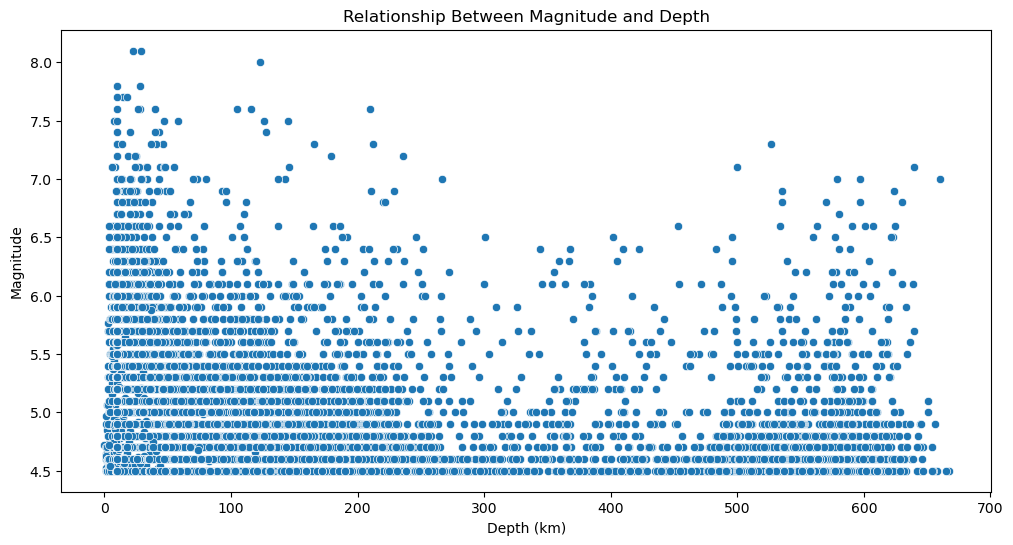

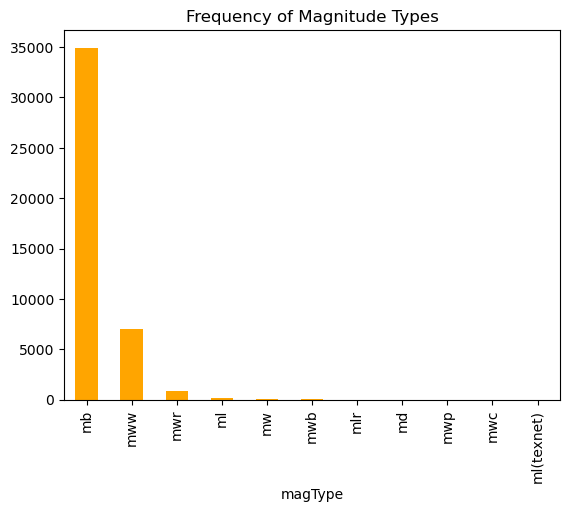

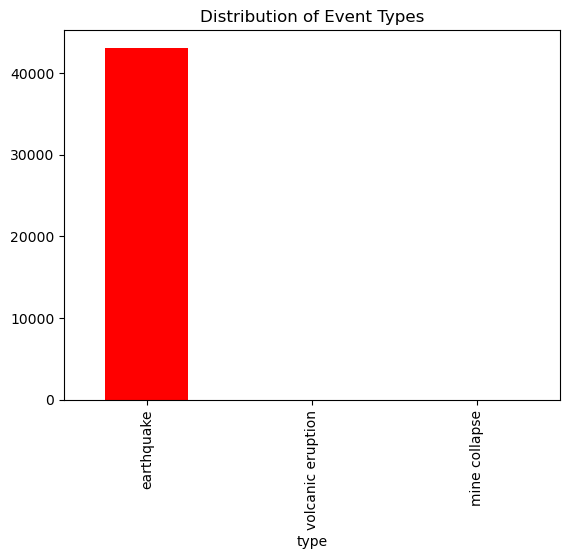

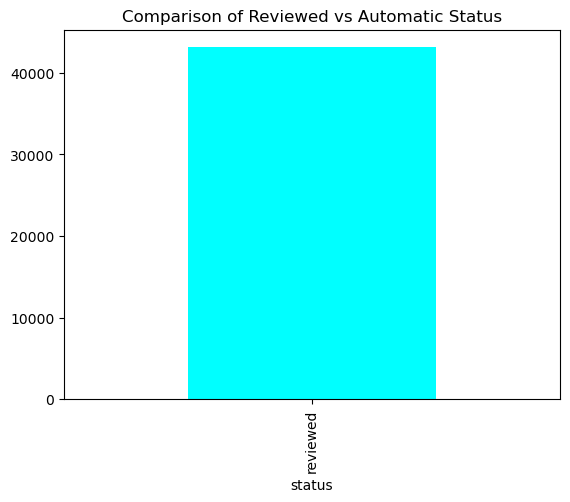

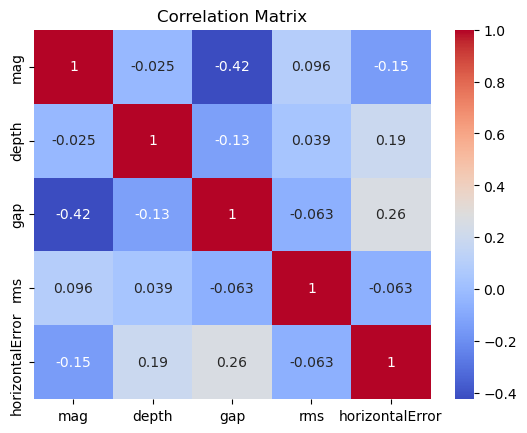

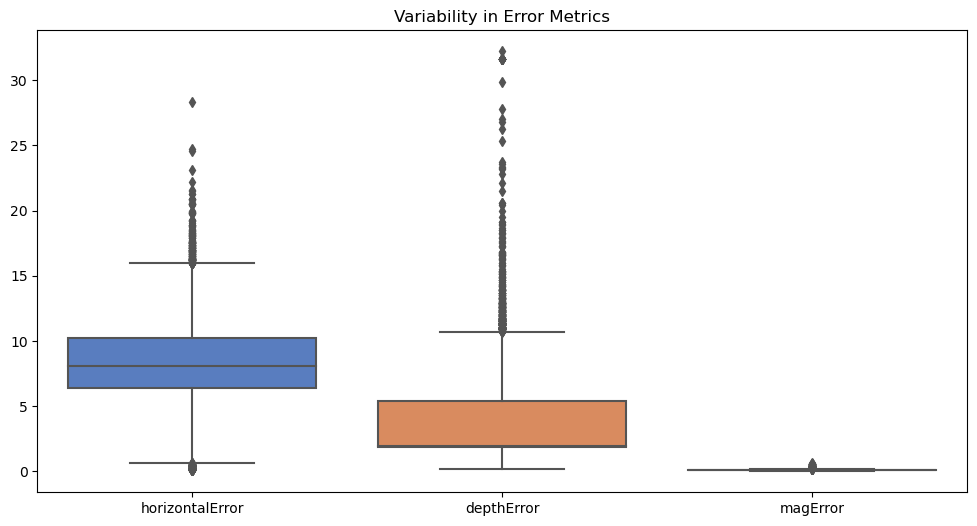

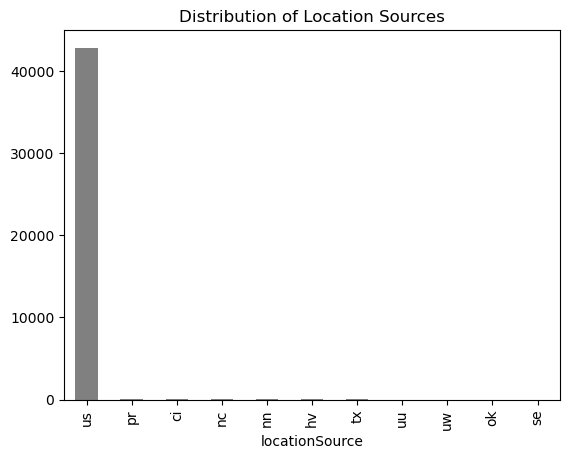

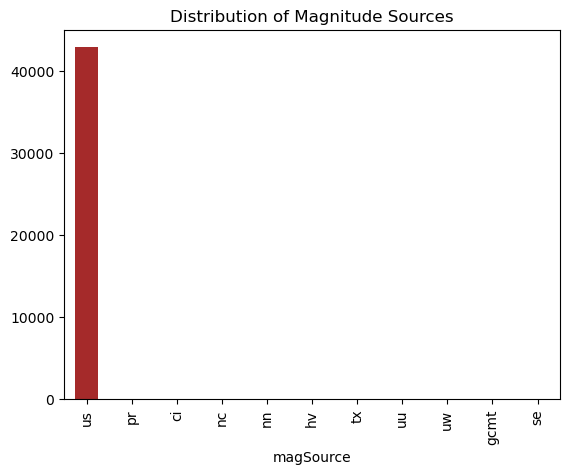

Analysis Complete.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import pearsonr

file_path = 'combined_query.csv'
data = pd.read_csv(file_path)

data['time'] = pd.to_datetime(data['time'], errors='coerce')

data['nst'] = data['nst'].fillna(data['nst'].mean())
data['gap'] = data['gap'].fillna(data['gap'].median())
data['dmin'] = data['dmin'].fillna(data['dmin'].median())
data['horizontalError'] = data['horizontalError'].fillna(data['horizontalError'].median())
data['magError'] = data['magError'].fillna(data['magError'].median())
data['depthError'] = data['depthError'].fillna(data['depthError'].median())
data = data.dropna()  


print("\nDescriptive Statistics:")
print(data.describe())


plt.figure(figsize=(12, 6))
sns.histplot(data['mag'], bins=30, kde=True, color='blue')
plt.title("Distribution of Magnitudes")
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data['depth'], bins=30, kde=True, color='green')
plt.title("Distribution of Depths")
plt.show()

top_regions = data['place'].value_counts().head(10)
top_regions.plot(kind='barh', color='purple')
plt.title("Top 10 Regions with Most Events")
plt.show()

data['year_month'] = data['time'].dt.to_period('M')
monthly_trends = data.groupby('year_month').size()

plt.figure(figsize=(14, 7))
monthly_trends.plot()
plt.title("Monthly Trends of Seismic Activities")
plt.xlabel("Time")
plt.ylabel("Event Count")
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(data['longitude'], data['latitude'], c=data['depth'], cmap='viridis', s=1)
plt.colorbar(label='Depth (km)')
plt.title("Geographic Distribution of Seismic Events")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# K-Means Clustering
coordinates = data[['latitude', 'longitude']]
kmeans = KMeans(n_clusters=5, random_state=0)
data['cluster'] = kmeans.fit_predict(coordinates)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='longitude', y='latitude', hue='cluster', palette='Set2', s=10)
plt.title("Clustering of Seismic Events")
plt.show()

# Magnitude and Depth Analysis
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data['depth'], y=data['mag'])
plt.title("Relationship Between Magnitude and Depth")
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.show()

# Magnitude Type Frequency
mag_types = data['magType'].value_counts()
mag_types.plot(kind='bar', color='orange')
plt.title("Frequency of Magnitude Types")
plt.show()

# 6. Event Classification
event_types = data['type'].value_counts()
event_types.plot(kind='bar', color='red')
plt.title("Distribution of Event Types")
plt.show()

status_counts = data['status'].value_counts()
status_counts.plot(kind='bar', color='cyan')
plt.title("Comparison of Reviewed vs Automatic Status")
plt.show()

# Correlation Analysis
correlation_matrix = data[['mag', 'depth', 'gap', 'rms', 'horizontalError']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Error Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['horizontalError', 'depthError', 'magError']], palette='muted')
plt.title("Variability in Error Metrics")
plt.show()

# Source Analysis
location_source_counts = data['locationSource'].value_counts()
location_source_counts.plot(kind='bar', color='gray')
plt.title("Distribution of Location Sources")
plt.show()

mag_source_counts = data['magSource'].value_counts()
mag_source_counts.plot(kind='bar', color='brown')
plt.title("Distribution of Magnitude Sources")
plt.show()

print("Analysis Complete.")


1. Clustering
K-Means and DBSCAN Clustering Completed.


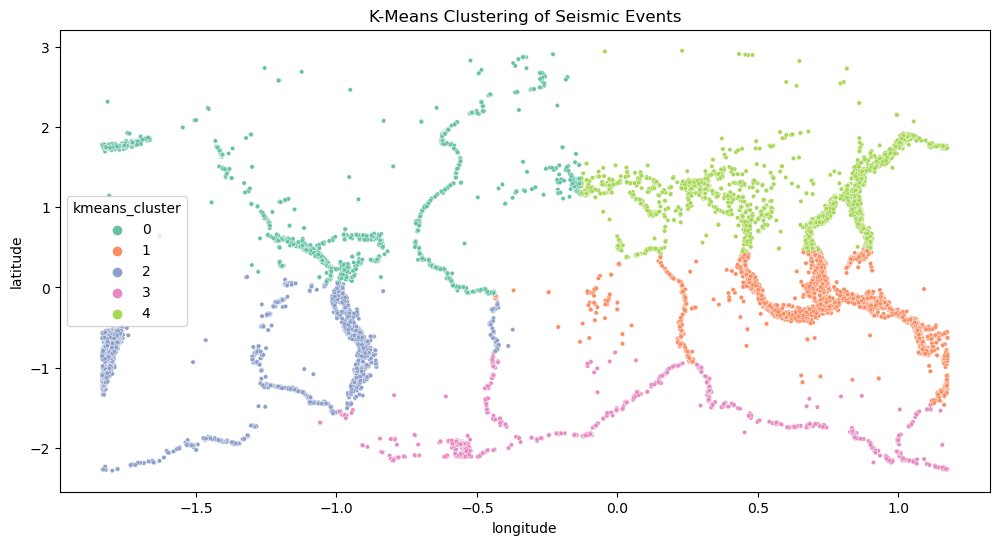


2. Regression
Mean Squared Error (Regression): 0.6114

3. Classification
Accuracy (Classification): 0.9996

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5435
           1       0.00      0.00      0.00         2

    accuracy                           1.00      5437
   macro avg       0.50      0.50      0.50      5437
weighted avg       1.00      1.00      1.00      5437

Machine Learning Analysis Complete.


C:\Users\Ashik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ashik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ashik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler

file_path = 'combined_query.csv'
data = pd.read_csv(file_path)

data['time'] = pd.to_datetime(data['time'], errors='coerce')
data = data.dropna()

data = data[['latitude', 'longitude', 'depth', 'mag', 'nst', 'gap', 'dmin', 'rms', 'type', 'status']]

scaler = StandardScaler()
numerical_features = ['latitude', 'longitude', 'depth', 'mag', 'nst', 'gap', 'dmin', 'rms']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

print("1. Clustering")

# K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=0)
data['kmeans_cluster'] = kmeans.fit_predict(data[['latitude', 'longitude']])

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=10)
data['dbscan_cluster'] = dbscan.fit_predict(data[['latitude', 'longitude']])

print("K-Means and DBSCAN Clustering Completed.")

# Visualization of K-Means
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='longitude', y='latitude', hue='kmeans_cluster', palette='Set2', s=10)
plt.title("K-Means Clustering of Seismic Events")
plt.show()

# Regression
print("\n2. Regression")

# Regression to Predict Magnitude
X = data[['depth', 'nst', 'gap', 'dmin', 'rms']]
y = data['mag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Evaluate Regression Model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Regression): {mse:.4f}")

# Classification
print("\n3. Classification")

data['type'] = data['type'].astype('category').cat.codes  # Encode event type
X = data[['depth', 'mag', 'nst', 'gap', 'dmin', 'rms']]
y = data['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Classification Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (Classification): {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("Machine Learning Analysis Complete.")

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler


file_path = 'combined_query.csv'
data = pd.read_csv(file_path)


data['time'] = pd.to_datetime(data['time'], errors='coerce')
data = data.dropna()


data = data[['latitude', 'longitude', 'depth', 'mag', 'nst', 'gap', 'dmin', 'rms', 'type', 'status']]


data['type'] = data['type'].astype('category').cat.codes
data['status'] = data['status'].astype('category').cat.codes


scaler = StandardScaler()
numerical_features = ['latitude', 'longitude', 'depth', 'mag', 'nst', 'gap', 'dmin', 'rms']
data[numerical_features] = scaler.fit_transform(data[numerical_features])


X = data[['depth', 'mag', 'nst', 'gap', 'dmin', 'rms']]
y = data['type']  # Use 'type' for classification


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print("1. Linear Regression")
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")


print("\n2. Random Forest Classifier")
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


print("\n3. K-Nearest Neighbors")
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


print("\n4. Support Vector Machine")
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


print("\n5. Gradient Boosting (XGBoost)")
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

print("\nAll models executed successfully.")


1. Linear Regression
Mean Squared Error: 0.0004

2. Random Forest Classifier
Accuracy: 0.9996
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5435
           1       0.00      0.00      0.00         2

    accuracy                           1.00      5437
   macro avg       0.50      0.50      0.50      5437
weighted avg       1.00      1.00      1.00      5437


3. K-Nearest Neighbors


C:\Users\Ashik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ashik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ashik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9996
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5435
           1       0.00      0.00      0.00         2

    accuracy                           1.00      5437
   macro avg       0.50      0.50      0.50      5437
weighted avg       1.00      1.00      1.00      5437


4. Support Vector Machine
Accuracy: 0.9996
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5435
           1       0.00      0.00      0.00         2

    accuracy                           1.00      5437
   macro avg       0.50      0.50      0.50      5437
weighted avg       1.00      1.00      1.00      5437


5. Gradient Boosting (XGBoost)


C:\Users\Ashik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ashik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ashik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ashik\anaconda3\Lib\site-packag

Accuracy: 0.9996
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5435
           1       0.00      0.00      0.00         2

    accuracy                           1.00      5437
   macro avg       0.50      0.50      0.50      5437
weighted avg       1.00      1.00      1.00      5437


All models executed successfully.


C:\Users\Ashik\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:26:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Ashik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ashik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ashik\anaconda3\Lib\site-package

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler


file_path = 'combined_query.csv'
data = pd.read_csv(file_path)


data['time'] = pd.to_datetime(data['time'], errors='coerce')
data = data.dropna()


data = data[['latitude', 'longitude', 'depth', 'mag', 'nst', 'gap', 'dmin', 'rms', 'type', 'status']]


data['type'] = data['type'].astype('category').cat.codes
data['status'] = data['status'].astype('category').cat.codes


scaler = StandardScaler()
numerical_features = ['latitude', 'longitude', 'depth', 'mag', 'nst', 'gap', 'dmin', 'rms']
data[numerical_features] = scaler.fit_transform(data[numerical_features])


X = data[['depth', 'nst', 'gap', 'dmin', 'rms']]
y_regression = data['mag']  
y_classification = data['type']  


X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.3, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_classification, test_size=0.3, random_state=42)


print("1. Linear Regression")
regressor = LinearRegression()
regressor.fit(X_train_reg, y_train_reg)
y_pred_reg = regressor.predict(X_test_reg)


print("\nExample Regression Predictions (First 10):")
print(y_pred_reg[:10])  # Display first 10 predictions
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Mean Squared Error: {mse:.4f}")


print("\n2. Random Forest Classifier")
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)
rf_classifier.fit(X_train_clf, y_train_clf)
y_pred_clf_rf = rf_classifier.predict(X_test_clf)


print("\nExample Classification Predictions (First 10):")
print(y_pred_clf_rf[:10])  # Display first 10 predictions
accuracy_rf = accuracy_score(y_test_clf, y_pred_clf_rf)
print(f"Accuracy: {accuracy_rf * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test_clf, y_pred_clf_rf))


print("\n3. K-Nearest Neighbors")
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_clf, y_train_clf)
y_pred_clf_knn = knn_classifier.predict(X_test_clf)


accuracy_knn = accuracy_score(y_test_clf, y_pred_clf_knn)
print(f"Accuracy: {accuracy_knn * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test_clf, y_pred_clf_knn))


print("\n4. Support Vector Machine")
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_clf, y_train_clf)
y_pred_clf_svm = svm_classifier.predict(X_test_clf)


accuracy_svm = accuracy_score(y_test_clf, y_pred_clf_svm)
print(f"Accuracy: {accuracy_svm * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test_clf, y_pred_clf_svm))


print("\n5. Gradient Boosting (XGBoost)")
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_classifier.fit(X_train_clf, y_train_clf)
y_pred_clf_xgb = xgb_classifier.predict(X_test_clf)


accuracy_xgb = accuracy_score(y_test_clf, y_pred_clf_xgb)
print(f"Accuracy: {accuracy_xgb * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test_clf, y_pred_clf_xgb))


1. Linear Regression

Example Regression Predictions (First 10):
[-0.19562798 -0.81165043  0.07898863 -0.51501803  0.076803   -0.02755712
 -0.22400076 -0.95136609 -0.07047882 -0.34754819]
Mean Squared Error: 0.6114

2. Random Forest Classifier

Example Classification Predictions (First 10):
[0 0 0 0 0 0 0 0 0 0]
Accuracy: 99.96%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5435
           1       0.00      0.00      0.00         2

    accuracy                           1.00      5437
   macro avg       0.50      0.50      0.50      5437
weighted avg       1.00      1.00      1.00      5437


3. K-Nearest Neighbors


C:\Users\Ashik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ashik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ashik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 99.96%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5435
           1       0.00      0.00      0.00         2

    accuracy                           1.00      5437
   macro avg       0.50      0.50      0.50      5437
weighted avg       1.00      1.00      1.00      5437


4. Support Vector Machine
Accuracy: 99.96%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5435
           1       0.00      0.00      0.00         2

    accuracy                           1.00      5437
   macro avg       0.50      0.50      0.50      5437
weighted avg       1.00      1.00      1.00      5437


5. Gradient Boosting (XGBoost)


C:\Users\Ashik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ashik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ashik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ashik\anaconda3\Lib\site-packag

Accuracy: 99.96%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5435
           1       0.00      0.00      0.00         2

    accuracy                           1.00      5437
   macro avg       0.50      0.50      0.50      5437
weighted avg       1.00      1.00      1.00      5437



C:\Users\Ashik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ashik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ashik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Presictions


--- Regression Predictions ---
Mean Squared Error for Magnitude Prediction: 0.6153
Mean Squared Error for Depth Prediction: 0.9544
Mean Squared Error for Distance Prediction: 0.8290
Mean Squared Error for Error Estimation: 7.7859

--- Classification Predictions ---


C:\Users\Ashik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ashik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ashik\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report for Event Type:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5435
           1       0.00      0.00      0.00         2

    accuracy                           1.00      5437
   macro avg       0.50      0.50      0.50      5437
weighted avg       1.00      1.00      1.00      5437

Classification Report for Review Status:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5437

    accuracy                           1.00      5437
   macro avg       1.00      1.00      1.00      5437
weighted avg       1.00      1.00      1.00      5437


--- Clustering Predictions ---


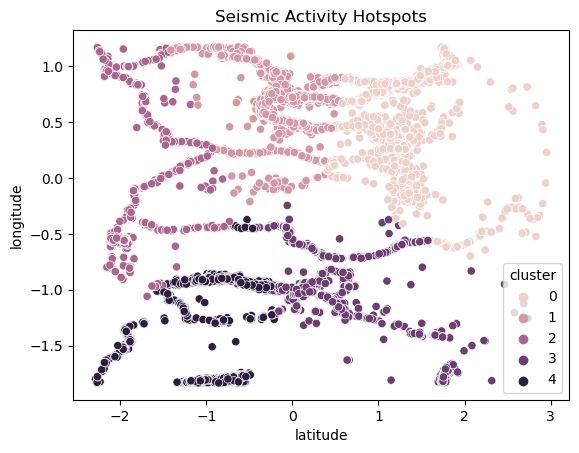


--- Time-Series Forecasting ---


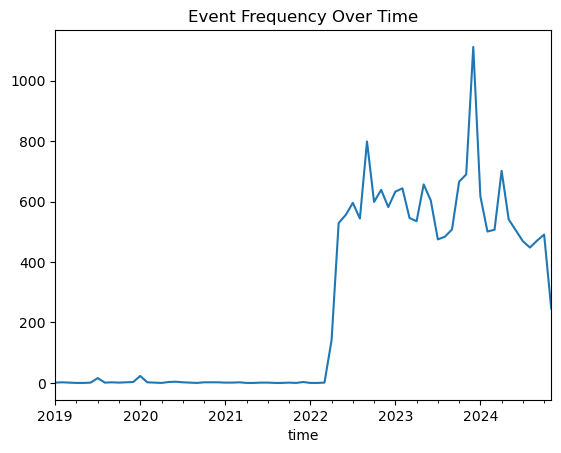


--- Anomaly Detection ---
Number of Anomalous Events Detected: 2928

--- Geospatial Predictions ---


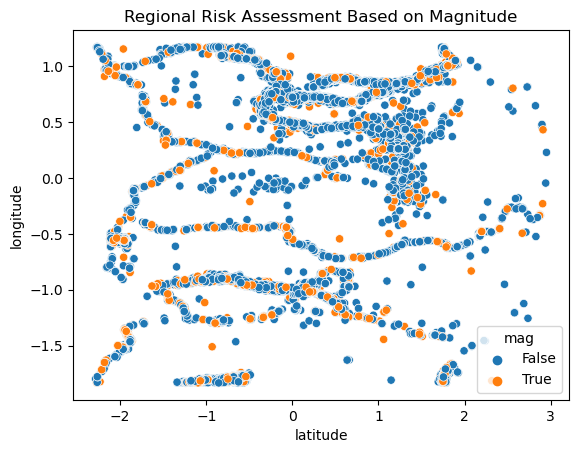

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import IsolationForest


file_path = 'combined_query.csv'  # Replace with your dataset path
data = pd.read_csv(file_path)



data['time'] = pd.to_datetime(data['time'], errors='coerce')
data = data.dropna()


data['type'] = data['type'].astype('category').cat.codes
data['status'] = data['status'].astype('category').cat.codes
data['locationSource'] = data['locationSource'].astype('category').cat.codes
data['magSource'] = data['magSource'].astype('category').cat.codes


scaler = StandardScaler()
numerical_features = ['latitude', 'longitude', 'depth', 'mag', 'nst', 'gap', 'dmin', 'rms']
data[numerical_features] = scaler.fit_transform(data[numerical_features])


X_features = ['depth', 'gap', 'nst', 'rms']  # Example for magnitude prediction
y_magnitude = data['mag']  # Target for magnitude prediction
y_depth = data['depth']  # Target for depth prediction


print("\n--- Regression Predictions ---")

X_train, X_test, y_train, y_test = train_test_split(data[X_features], y_magnitude, test_size=0.3, random_state=42)
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)
y_pred_magnitude = model_reg.predict(X_test)
mse_magnitude = mean_squared_error(y_test, y_pred_magnitude)
print(f"Mean Squared Error for Magnitude Prediction: {mse_magnitude:.4f}")


X_train, X_test, y_train, y_test = train_test_split(data[['latitude', 'longitude', 'mag']], y_depth, test_size=0.3, random_state=42)
model_depth = LinearRegression()
model_depth.fit(X_train, y_train)
y_pred_depth = model_depth.predict(X_test)
mse_depth = mean_squared_error(y_test, y_pred_depth)
print(f"Mean Squared Error for Depth Prediction: {mse_depth:.4f}")


X_train, X_test, y_train, y_test = train_test_split(data[['latitude', 'longitude', 'depth', 'mag']], data['dmin'], test_size=0.3, random_state=42)
model_dist = LinearRegression()
model_dist.fit(X_train, y_train)
y_pred_distance = model_dist.predict(X_test)
mse_distance = mean_squared_error(y_test, y_pred_distance)
print(f"Mean Squared Error for Distance Prediction: {mse_distance:.4f}")


X_train, X_test, y_train, y_test = train_test_split(data[['nst', 'rms']], data['horizontalError'], test_size=0.3, random_state=42)
model_error = LinearRegression()
model_error.fit(X_train, y_train)
y_pred_error = model_error.predict(X_test)
mse_error = mean_squared_error(y_test, y_pred_error)
print(f"Mean Squared Error for Error Estimation: {mse_error:.4f}")


print("\n--- Classification Predictions ---")

X_train, X_test, y_train, y_test = train_test_split(data[X_features], data['type'], test_size=0.3, random_state=42)
clf_event_type = RandomForestClassifier(random_state=42)
clf_event_type.fit(X_train, y_train)
y_pred_event_type = clf_event_type.predict(X_test)
print("Classification Report for Event Type:\n", classification_report(y_test, y_pred_event_type))


X_train, X_test, y_train, y_test = train_test_split(data[X_features], data['status'], test_size=0.3, random_state=42)
clf_status = RandomForestClassifier(random_state=42)
clf_status.fit(X_train, y_train)
y_pred_status = clf_status.predict(X_test)
print("Classification Report for Review Status:\n", classification_report(y_test, y_pred_status))


print("\n--- Clustering Predictions ---")

kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(data[['latitude', 'longitude']])
sns.scatterplot(x='latitude', y='longitude', hue='cluster', data=data)
plt.title('Seismic Activity Hotspots')
plt.show()


print("\n--- Time-Series Forecasting ---")
data.set_index('time', inplace=True)
event_counts = data.resample('M').size()
event_counts.plot()
plt.title('Event Frequency Over Time')
plt.show()


print("\n--- Anomaly Detection ---")
iso_forest = IsolationForest(random_state=42)
data['anomaly'] = iso_forest.fit_predict(data[X_features])
anomalies = data[data['anomaly'] == -1]
print(f"Number of Anomalous Events Detected: {len(anomalies)}")


print("\n--- Geospatial Predictions ---")
# A. Reginal Risk Assessment
sns.scatterplot(x='latitude', y='longitude', hue=data['mag'] > 0.5, data=data)
plt.title('Regional Risk Assessment Based on Magnitude')
plt.show()


# Earthquake prediction

Earthquake Prediction Model Accuracy: 100.00%
Enter latitude: 22.656722
Enter longitude: 90.359831

Earthquake Prediction for Location (22.656722, 90.359831):
Probability of an Earthquake: 0.89%
Significant Earthquake Likely: Yes
Next Earthquake Likely Around: 2024-12-01 00:00:00+00:00


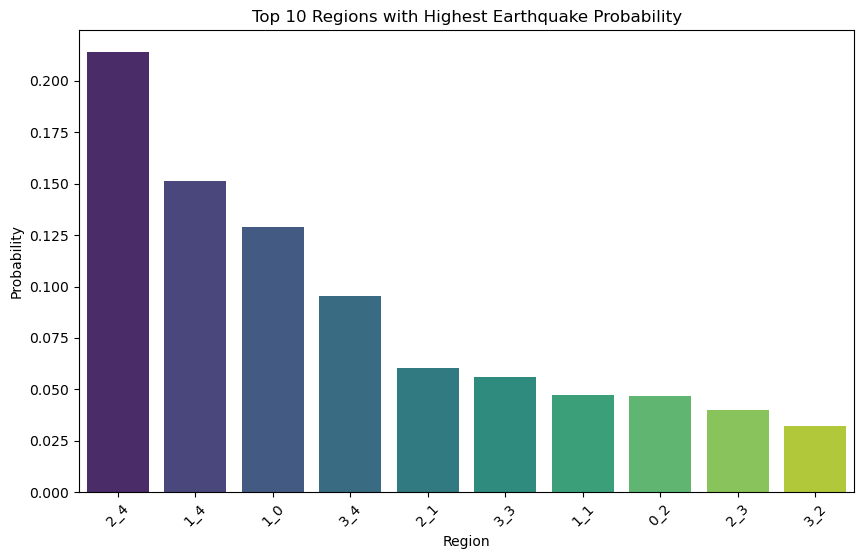

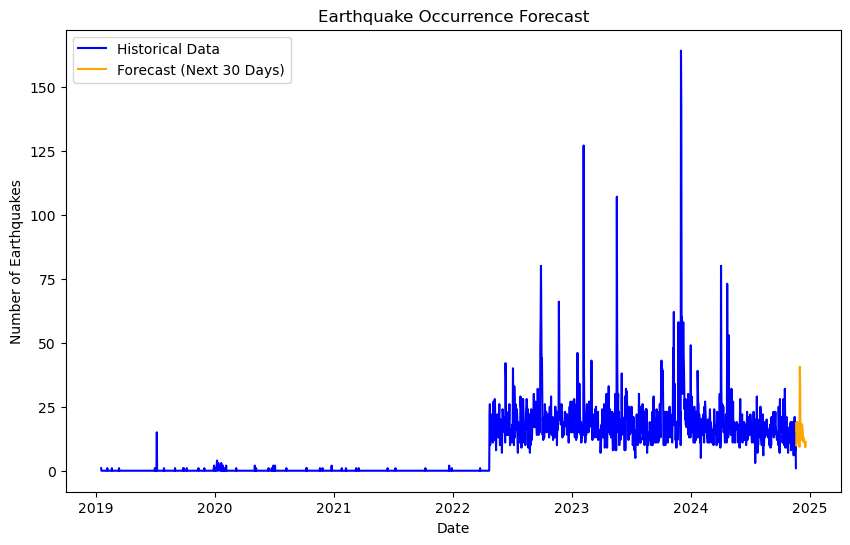

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


file_path = 'combined_query.csv'  
data = pd.read_csv(file_path)



data['time'] = pd.to_datetime(data['time'], errors='coerce')
data = data.dropna()


data['type'] = data['type'].astype('category').cat.codes


data.set_index('time', inplace=True)



def define_regions(df, lat_bins=5, lon_bins=5):
    """
    Discretize latitude and longitude into regions for probability analysis.
    """
    df['lat_bin'] = pd.cut(df['latitude'], bins=lat_bins, labels=False)
    df['lon_bin'] = pd.cut(df['longitude'], bins=lon_bins, labels=False)
    df['region'] = df['lat_bin'].astype(str) + "_" + df['lon_bin'].astype(str)
    return df

data = define_regions(data)


region_probs = data['region'].value_counts(normalize=True)


event_counts = data.resample('D').size()


model = ExponentialSmoothing(event_counts, seasonal='add', seasonal_periods=365).fit()
forecast = model.forecast(30)  # Predict for the next 30 days



X = data[['latitude', 'longitude', 'depth', 'mag']]
y = (data['mag'] >= 4.0).astype(int)  # Binary classification for significant earthquakes (>=4.0 magnitude)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Earthquake Prediction Model Accuracy: {accuracy * 100:.2f}%")

# Interactive Prediction Section ---
def predict_earthquake(lat, lon):
    """
    Predict earthquake probability and next occurrence based on input latitude and longitude.
    """

    region = str(pd.cut([lat], bins=5, labels=False)[0]) + "_" + str(pd.cut([lon], bins=5, labels=False)[0])
    

    region_prob = region_probs.get(region, 0)
    

    features = pd.DataFrame([[lat, lon, 0, 0]], columns=['latitude', 'longitude', 'depth', 'mag'])
    is_earthquake = clf.predict(features)[0]
    

    next_date = forecast.idxmax()
    return region_prob, is_earthquake, next_date


latitude = float(input("Enter latitude: "))
longitude = float(input("Enter longitude: "))

prob, is_eq, next_eq_date = predict_earthquake(latitude, longitude)

print(f"\nEarthquake Prediction for Location ({latitude}, {longitude}):")
print(f"Probability of an Earthquake: {prob:.2%}")
print(f"Significant Earthquake Likely: {'Yes' if is_eq else 'No'}")
print(f"Next Earthquake Likely Around: {next_eq_date}")



plt.figure(figsize=(10, 6))
sns.barplot(x=region_probs.index[:10], y=region_probs.values[:10], palette="viridis")
plt.title("Top 10 Regions with Highest Earthquake Probability")
plt.xlabel("Region")
plt.ylabel("Probability")
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(event_counts, label='Historical Data', color='blue')
plt.plot(forecast, label='Forecast (Next 30 Days)', color='orange')
plt.title("Earthquake Occurrence Forecast")
plt.xlabel("Date")
plt.ylabel("Number of Earthquakes")
plt.legend()
plt.show()


# Python Code for Pattern Analysis


--- Correlation Analysis ---
          depth       mag       gap      dmin       rms
depth  1.000000 -0.026940 -0.133136 -0.090099  0.039354
mag   -0.026940  1.000000 -0.422025 -0.010431  0.095224
gap   -0.133136 -0.422025  1.000000  0.048401 -0.063784
dmin  -0.090099 -0.010431  0.048401  1.000000 -0.100953
rms    0.039354  0.095224 -0.063784 -0.100953  1.000000


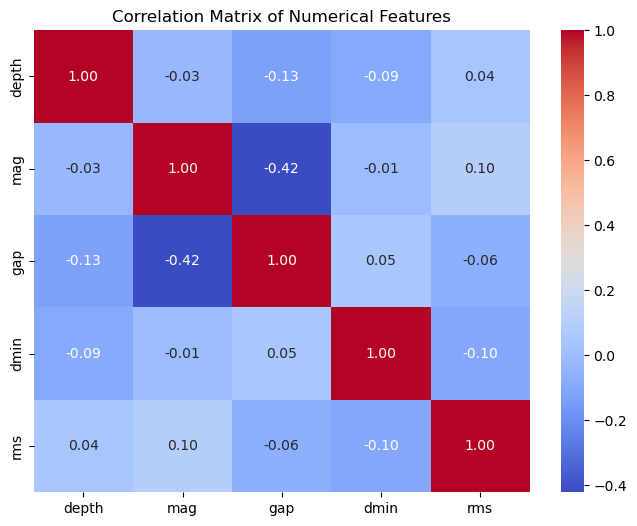


--- Magnitude vs. Depth Relationship ---


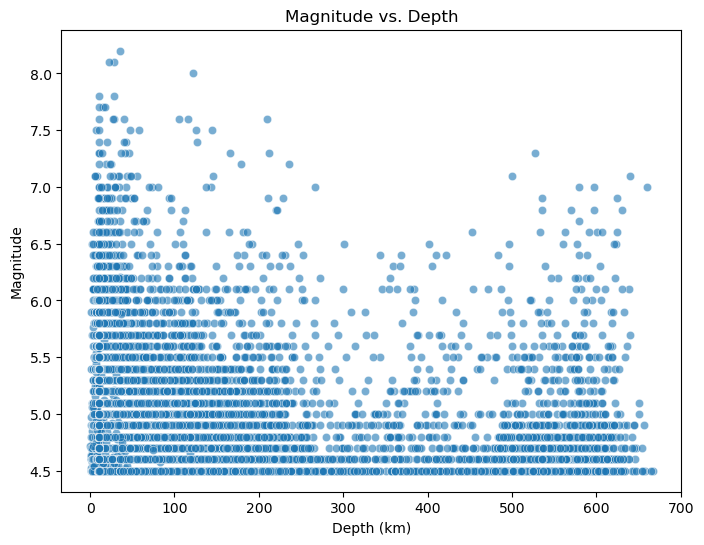

Pearson Correlation Coefficient (Magnitude vs. Depth): -0.03

--- Temporal Trends ---


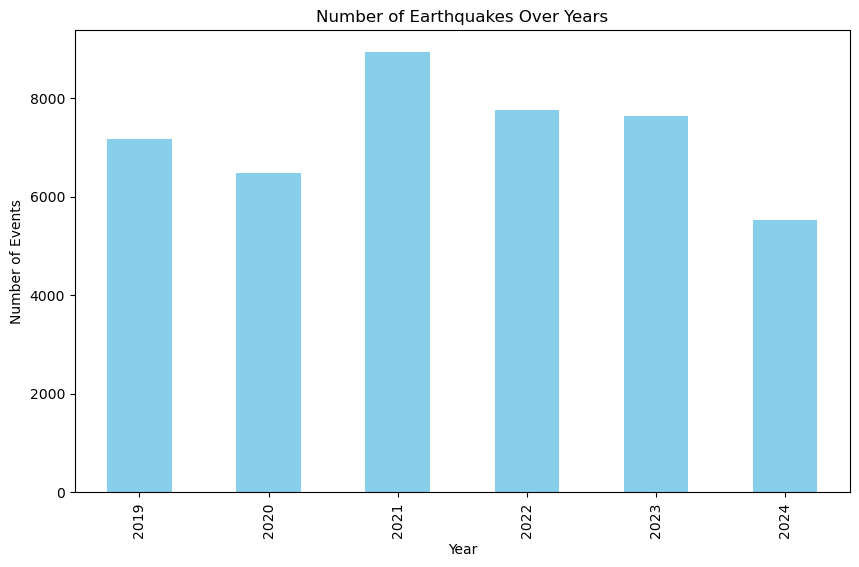


--- Geographic Distribution ---


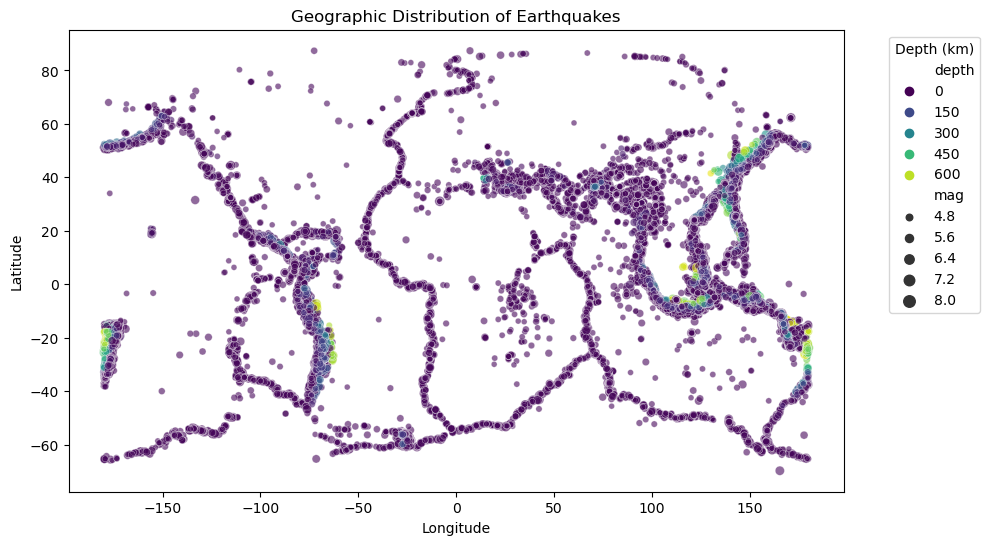


--- Magnitude Distribution ---


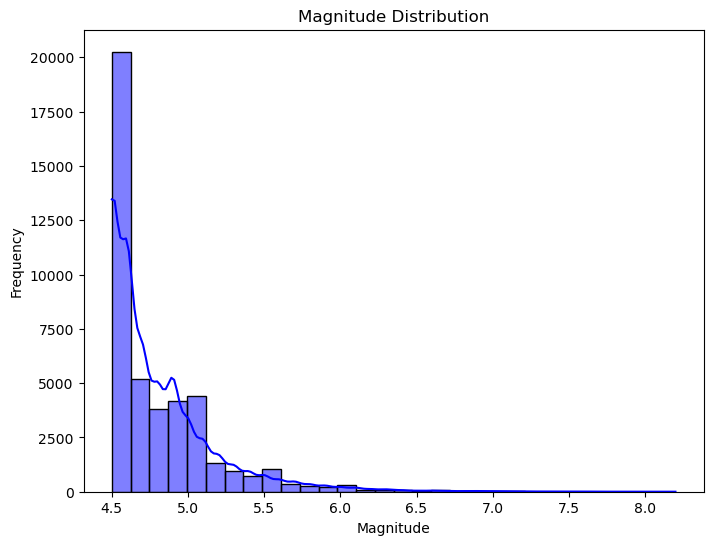


--- Event Frequency by Region ---


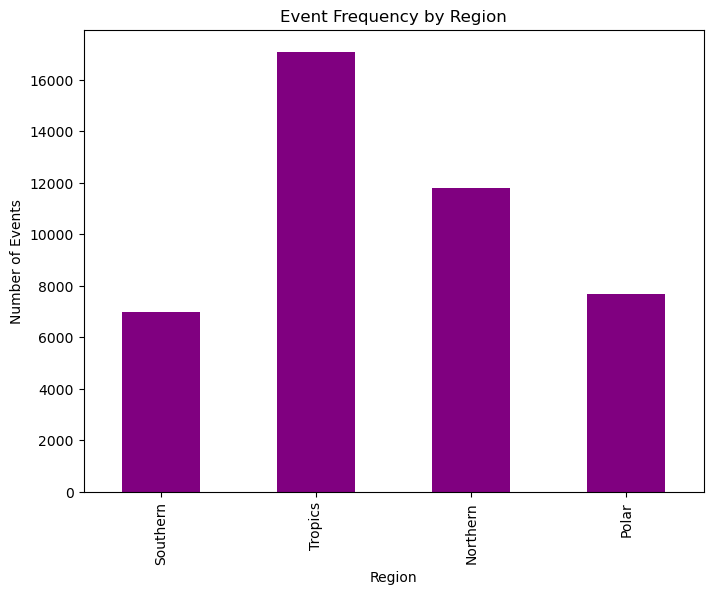

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


file_path = 'combined_query.csv'  # Replace with your dataset path
data = pd.read_csv(file_path)


data['time'] = pd.to_datetime(data['time'], errors='coerce')


data = data.dropna(subset=['latitude', 'longitude', 'depth', 'mag', 'time'])




print("\n--- Correlation Analysis ---")
correlation_matrix = data[['depth', 'mag', 'gap', 'dmin', 'rms']].corr()
print(correlation_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


print("\n--- Magnitude vs. Depth Relationship ---")
plt.figure(figsize=(8, 6))
sns.scatterplot(x='depth', y='mag', data=data, alpha=0.6)
plt.title('Magnitude vs. Depth')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.show()


corr_mag_depth, _ = pearsonr(data['depth'], data['mag'])
print(f"Pearson Correlation Coefficient (Magnitude vs. Depth): {corr_mag_depth:.2f}")


print("\n--- Temporal Trends ---")
data['year'] = data['time'].dt.year
yearly_counts = data.groupby('year').size()

plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Earthquakes Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.show()


print("\n--- Geographic Distribution ---")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', size='mag', hue='depth', data=data, alpha=0.6, palette='viridis')
plt.title('Geographic Distribution of Earthquakes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Depth (km)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


print("\n--- Magnitude Distribution ---")
plt.figure(figsize=(8, 6))
sns.histplot(data['mag'], bins=30, kde=True, color='blue')
plt.title('Magnitude Distribution')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()


print("\n--- Event Frequency by Region ---")
data['region'] = pd.cut(data['latitude'], bins=[-90, -30, 0, 30, 90], labels=['Southern', 'Tropics', 'Northern', 'Polar'])
region_counts = data.groupby('region').size()

plt.figure(figsize=(8, 6))
region_counts.plot(kind='bar', color='purple')
plt.title('Event Frequency by Region')
plt.xlabel('Region')
plt.ylabel('Number of Events')
plt.show()
